In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"E:\Programming\Machine Learning\Feature Engineering\Normalization\wine_data.csv", header=None, usecols=[0,1,2])

In [6]:
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [7]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

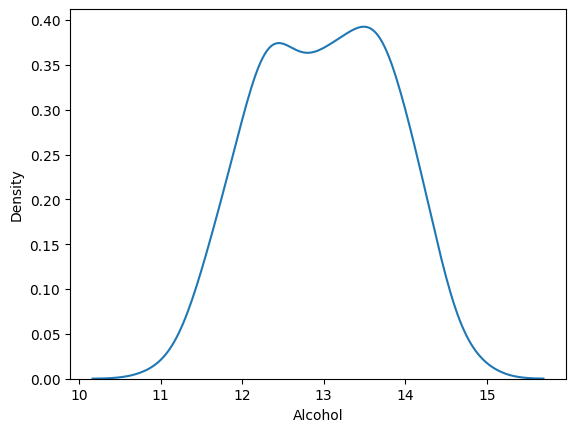

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

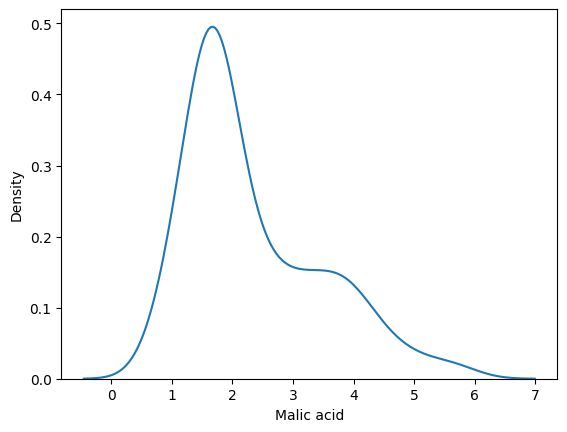

In [9]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

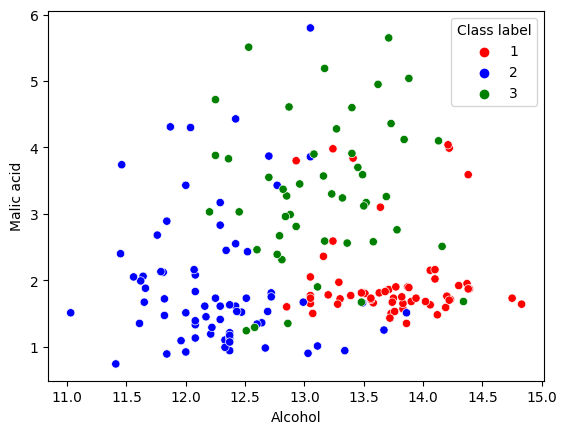

In [20]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label', palette=color_dict)

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                   df['Class label'], test_size=0.3,
                                                   random_state=0)

In [24]:
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [25]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [28]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


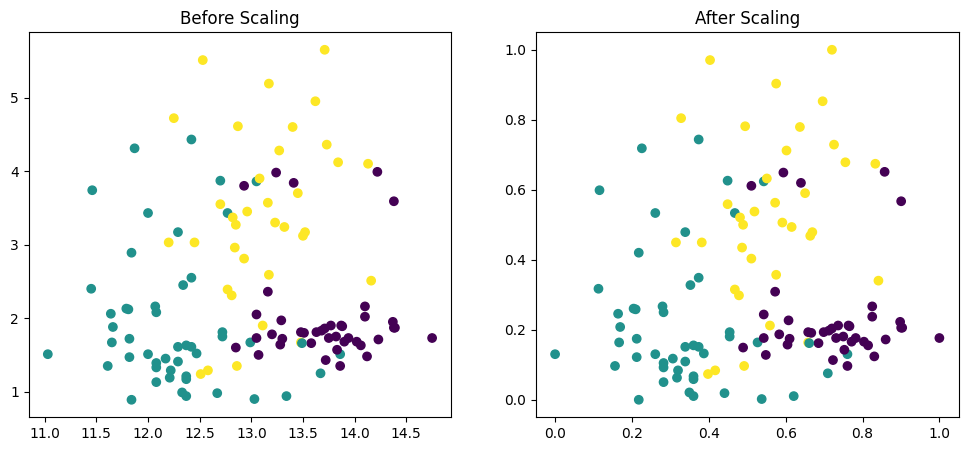

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

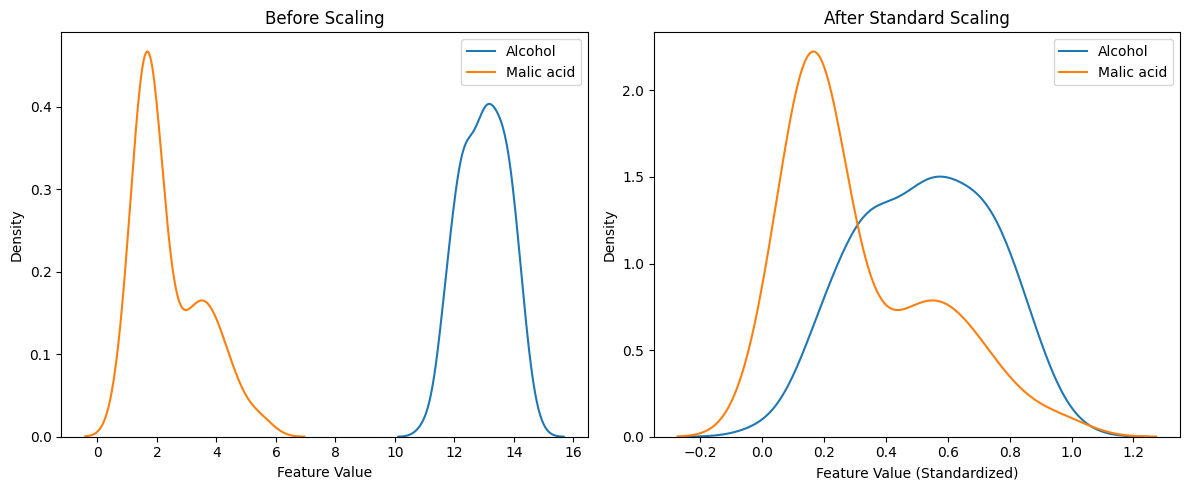

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(X_train['Malic acid'], ax=ax1, label='Malic acid')
ax1.set_xlabel('Feature Value')
ax1.set_ylabel('Density')
ax1.legend()

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2, label='Malic acid')
ax2.set_xlabel('Feature Value (Standardized)')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()


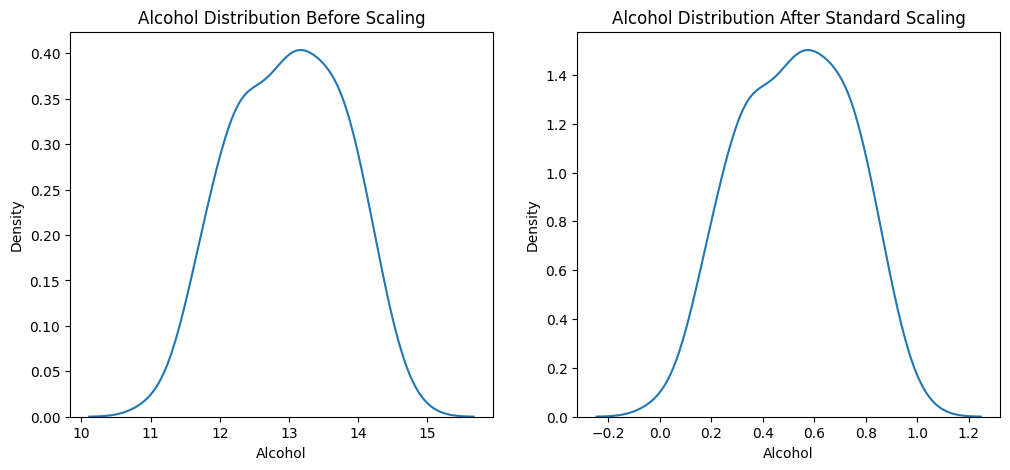

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

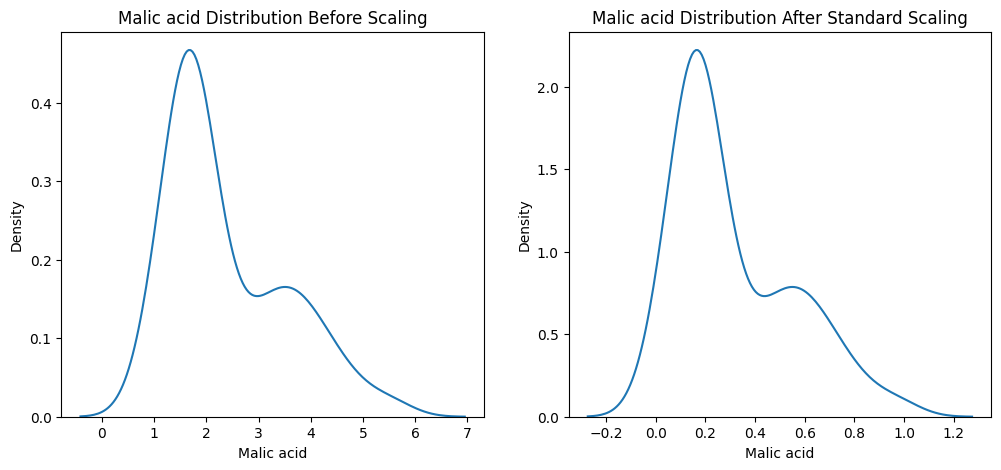

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

In [ ]:
from sklearn.preprocessing import 